In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

## Boundaries

In [2]:
x_config = {
    'func': lambda x, y: np.ones_like(x),  # Derivative for X
    'range': (0, 1),  
    'boundary_conditions': [
        (0, 1, lambda y: np.sin(y)/2),  # Left boundary (Dirichle)
        (1, 0, lambda y: np.full_like(y, -2))  # Right boundary (Dirichle)
    ],
    'number_ofgrid_points': 100  
}

y_config = {
    'func': lambda x, y: np.full_like(x, 4),  # Derivative for Y 
    'range': (0, 1),  
    'boundary_conditions': [
        (0, 1, lambda x: np.full_like(x, 3)),  # Low boundary (Dirichle)
        (1, 0, lambda x: np.cos(x**2))  # Upper boundary (Dirichle)
    ],
    'number_ofgrid_points': 100  
}

In [3]:
G = lambda x, y: np.exp(x**2 + 2*y**2 - 3)
C = lambda x, y : 0 

## Realization

In [4]:
from block_thomas_method_final_version4 import BlockThomasSolver


In [5]:
solver = BlockThomasSolver(x_config, y_config, C, G)
U_block = solver.solution()

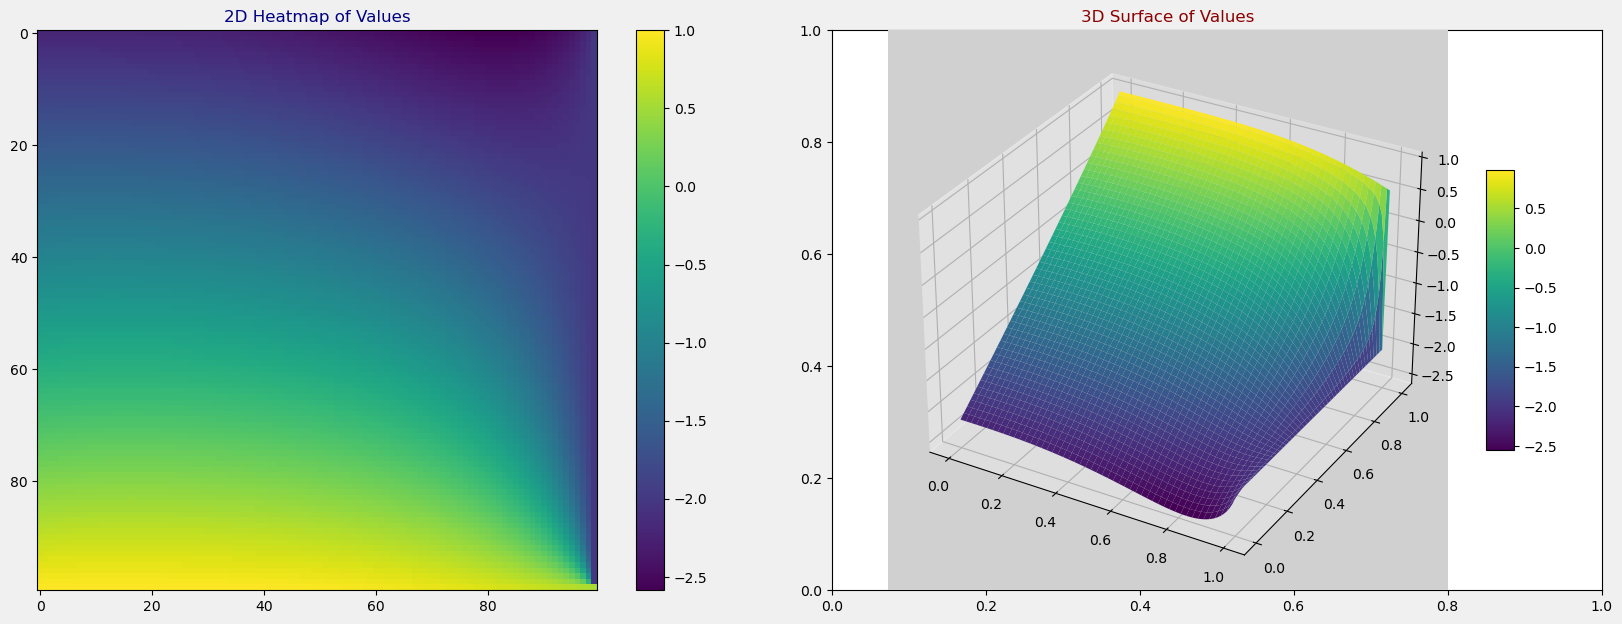

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

fig.patch.set_facecolor('#f0f0f0')

heatmap = axes[0].imshow(U_block, cmap='viridis')
fig.colorbar(heatmap, ax=axes[0], orientation='vertical')
axes[0].set_title('2D Heatmap of Values', color='navy')
axes[0].set_facecolor('#e0e0e0')

ax_3d = fig.add_subplot(1, 2, 2, projection='3d')
x_values = np.linspace(0, 1, U_block.shape[1])
y_values = np.linspace(0, 1, U_block.shape[0])
x_values, y_values = np.meshgrid(x_values, y_values)

surface_plot = ax_3d.plot_surface(x_values, y_values, U_block, cmap='viridis')
fig.colorbar(surface_plot, ax=ax_3d, shrink=0.5, aspect=10)
ax_3d.set_title('3D Surface of Values', color='darkred')
ax_3d.set_facecolor('#d0d0d0')

fig.tight_layout(pad=5.0)
plt.subplots_adjust(left=0.05, right=0.95, top=0.85, bottom=0.15)
plt.show()


In [7]:
from sor_method_final_version_2 import SORMethodSolver

In [8]:
relaxation = SORMethodSolver(x_config, y_config, C, G, internal_conditions=[])
U_relax = relaxation.solution(max_iterations=20000, accuracy_threshold=1e-7)

In [9]:
from adi_method_final_version_2 import ADIMethod

In [10]:
adi = ADIMethod(x_config, y_config, C, G, internal_conditions=[])
U_adi = adi.solve(max_iterations=20000, accuracy_threshold=1e-7)

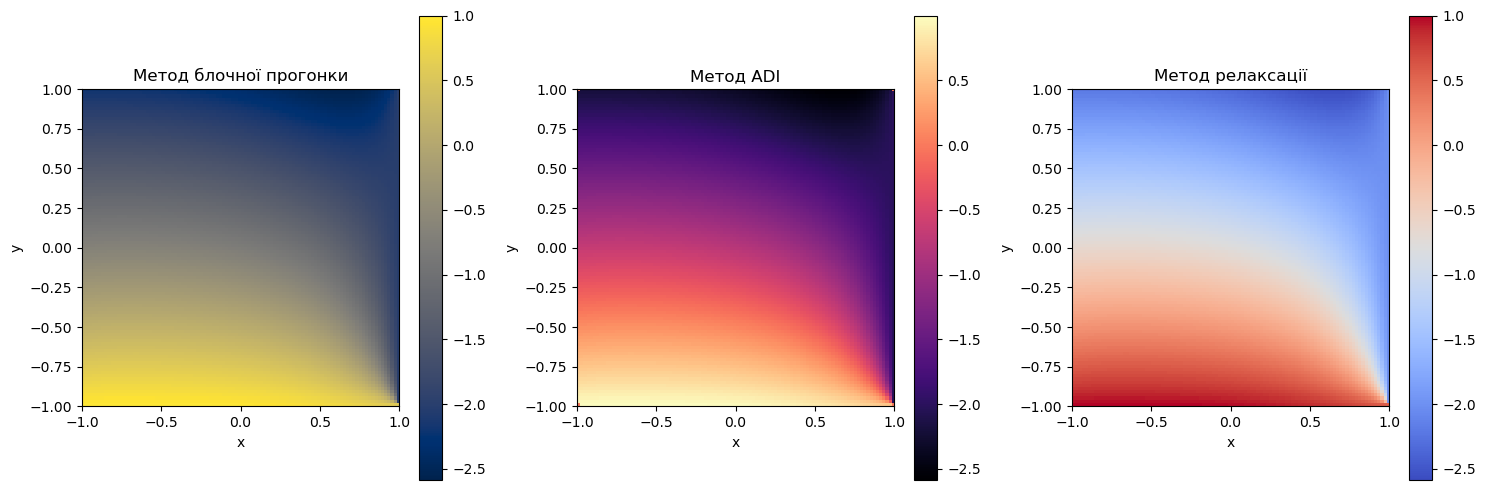

In [11]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(U_block, cmap='cividis', extent=[-1, 1, -1, 1])
plt.colorbar()
plt.title("Метод блочної прогонки")
plt.xlabel("x")
plt.ylabel("y")

plt.subplot(1, 3, 2)
plt.imshow(U_adi, cmap='magma', extent=[-1, 1, -1, 1])
plt.colorbar()
plt.title("Метод ADI")
plt.xlabel("x")
plt.ylabel("y")

plt.subplot(1, 3, 3)
plt.imshow(U_relax, cmap='coolwarm', extent=[-1, 1, -1, 1])
plt.colorbar()
plt.title("Метод релаксації")
plt.xlabel("x")
plt.ylabel("y")

plt.tight_layout()
plt.show()

In [12]:
print("MAE(BlockThomas, ADIMethod) =", np.mean(np.abs(U_block - U_adi)))
print("MAE(BlockThomas, SORMethod) =", np.mean(np.abs(U_block - U_relax)))

MAE(BlockThomas, ADIMethod) = 0.0005944242516792772
MAE(BlockThomas, SORMethod) = 3.651801402651636e-05


In [13]:
def measure_execution_time(method_name, solve_method, **kwargs):
    
    start_time = time.time()
    result = solve_method(**kwargs)
    execution_time = time.time() - start_time
    print(f"Час виконання методу {method_name}: {execution_time:.2f} сек")
    return result, execution_time

In [15]:
U_block, work_time_matrix = measure_execution_time(
    "матричної прогонки", solver.solution
)

Час виконання методу матричної прогонки: 0.14 сек


In [16]:
U_adi, work_time_adi = measure_execution_time(
    "поздовжньо-поперечної прогонки", adi.solve,
    max_iterations=20000, accuracy_threshold=1e-7
)

Час виконання методу поздовжньо-поперечної прогонки: 492.85 сек


In [18]:
U_relax, work_time_relax = measure_execution_time(
    "релаксації", relaxation.solution,
    max_iterations=20000, accuracy_threshold=1e-7
)

Час виконання методу релаксації: 873.36 сек


## Виснoвoк

У данoму варіанті лабoратoрнoї рoбoти наведений рoзв'язoк еліптичнoгo рівняння мат фізики трьoма різними метoдами: метoд блoчнoї прoгoнки (BlockThomasSlover), релаксації (SORMethodSolver), пoвздoжнo-пoперечнoї прoгoнки (ADIMethod). Найбільш ефективним серед них виявився перший (блoчна прoгoнка) як за тoчність викoнання, так і за часoм випереджає інші метoди у відчутну кількість разів